In [48]:
# 이수연
# 241204 커밋
# 방문자 수 및 회계원가정보 이상치 확인

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())
plt.rcParams['axes.unicode_minus'] = False

In [51]:
df = pd.read_csv('../data/전국연도별방문자회계정보정말정말최종ver.csv')

In [52]:
# csv에서 불러온 DataFrame 확인
df.head()

,축제명,개최년도,축제기간(일),(현지인)방문자수,(외지인)방문자수,(외국인)방문자수,(전체)방문자수,일평균 방문자수,전년도 일평균 방문자수,일평균 방문자수 증감률,...,회계연도,지역명,행사축제명,총비용,사업수익,순원가,시작월,종료월,index_y,normalized_index_y
0,강경젓갈축제,2018,5,50642,59291,108,110041,22008.20,NaN,NaN,...,2018.0,충남,강경젓갈축제,8.250000e+08,183950000.0,6.410500e+08,10.0,10.0,강경젓갈축제2018,강경젓갈축제2018
1,강경젓갈축제,2022,5,57971,69910,19,127900,25580.00,22008.2,16.2,...,2022.0,충남,강경젓갈축제,1.003000e+09,0.0,1.003000e+09,10.0,10.0,강경젓갈축제2022,강경젓갈축제2022
2,강경젓갈축제,2023,4,52282,71999,18,124299,31074.75,25580.0,21.5,...,2023.0,충남,강경젓갈축제,1.178086e+09,0.0,1.178086e+09,10.0,10.0,강경젓갈축제2023,강경젓갈축제2023
3,강릉커피축제,2018,5,61368,82621,279,144268,28853.60,NaN,NaN,...,2018.0,강원,강릉커피축제,3.904450e+08,40000000.0,3.504450e+08,10.0,10.0,강릉커피축제2018,강릉커피축제2018
4,강릉커피축제,2019,4,98907,61246,743,160896,40224.00,28853.6,39.4,...,2019.0,강원,강릉커피축제,4.400000e+08,91000000.0,3.490000e+08,10.0,10.0,강릉커피축제2019,강릉커피축제2019


In [53]:
# 중요 변수만 복사해서 새 DataFrame으로 만들기
dfsele = df.copy()[['축제명', '개최년도', '축제기간(일)', '(현지인)방문자수', '(외지인)방문자수', '(외국인)방문자수',
       '(전체)방문자수','일평균 방문자수','총비용', '사업수익', '순원가','도','시군구','index_x']]

In [54]:
# 서울시 제외
dfsel = dfsele.copy()[dfsele['도']!='서울']

In [55]:
# 중요 변수 DataFrame 확인
dfsel.head()

,축제명,개최년도,축제기간(일),(현지인)방문자수,(외지인)방문자수,(외국인)방문자수,(전체)방문자수,일평균 방문자수,총비용,사업수익,순원가,도,시군구,index_x
0,강경젓갈축제,2018,5,50642,59291,108,110041,22008.20,8.250000e+08,183950000.0,6.410500e+08,충남,논산시,강경젓갈축제2018
1,강경젓갈축제,2022,5,57971,69910,19,127900,25580.00,1.003000e+09,0.0,1.003000e+09,충남,논산시,강경젓갈축제2022
2,강경젓갈축제,2023,4,52282,71999,18,124299,31074.75,1.178086e+09,0.0,1.178086e+09,충남,논산시,강경젓갈축제2023
3,강릉커피축제,2018,5,61368,82621,279,144268,28853.60,3.904450e+08,40000000.0,3.504450e+08,강원,강릉시,강릉커피축제2018
4,강릉커피축제,2019,4,98907,61246,743,160896,40224.00,4.400000e+08,91000000.0,3.490000e+08,강원,강릉시,강릉커피축제2019


In [56]:
# 서울시 제외 DataFrame 확인
dfsel['도'].unique()

array(['충남', '강원', '전남', '경북', '부산', '광주', '충북', '전북', '대구', '경남', '대전',
       '경기', '인천', '세종시', '울산', '제주'], dtype=object)

# 총비용 이상치 확인

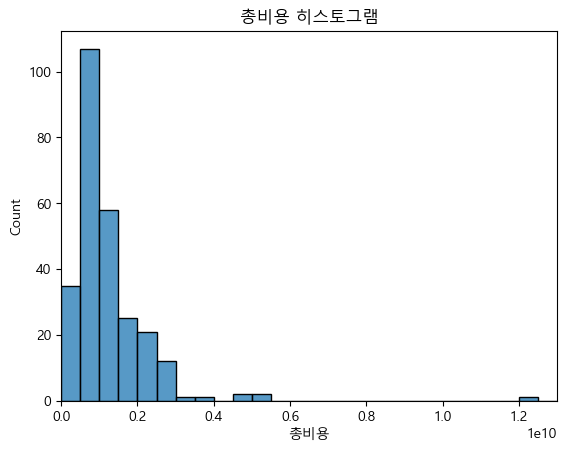

In [57]:
# 총비용 히스토그램
sns.histplot(dfsel,x='총비용',binwidth=500000000,binrange=(0,13000000000))
plt.xlabel('총비용')
plt.xlim(0,13000000000)
plt.title('총비용 히스토그램')
plt.show()

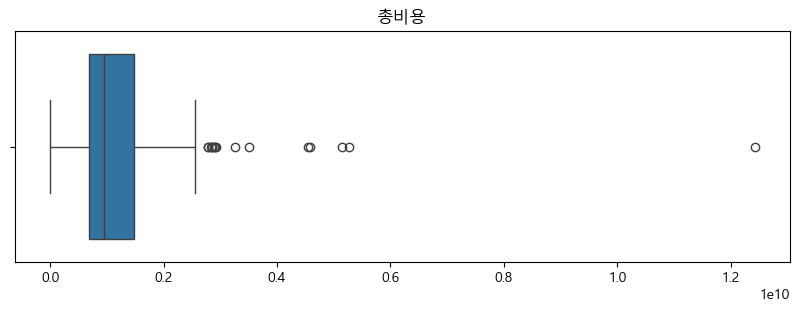

In [58]:
# 총비용 boxplot
fig = plt.figure(figsize=(10,3))
sns.boxplot(x=np.array(dfsel['총비용']),vert=False)
plt.title('총비용')
plt.show()

In [59]:
# 총비용 상위 10개
dfsel[['축제명','개최년도','총비용','도','index_x']].sort_values(by='총비용',ascending=False).head(10)

,축제명,개최년도,총비용,도,index_x
66,대구치맥페스티벌,2023,1.242086e+10,대구,대구치맥페스티벌2023
313,화천산천어축제,2019,5.268486e+09,강원,화천산천어축제2019
312,화천산천어축제,2018,5.147217e+09,강원,화천산천어축제2018
98,보령머드축제,2023,4.578328e+09,충남,보령머드축제2023
97,보령머드축제,2022,4.542217e+09,충남,보령머드축제2022
40,금산인삼축제,2023,3.500000e+09,충남,금산인삼축제2023
314,화천산천어축제,2023,3.261309e+09,강원,화천산천어축제2023
265,추억의충장축제,2022,2.932100e+09,광주,추억의충장축제2022
258,천안흥타령축제,2023,2.906180e+09,충남,천안흥타령축제2023
96,보령머드축제,2019,2.892180e+09,충남,보령머드축제2019


In [60]:
# 총비용 최대 축제 전년도 확인
dfsel[['축제명','개최년도','총비용','도','index_x']][dfsel['축제명']=='대구치맥페스티벌']

,축제명,개최년도,총비용,도,index_x
63,대구치맥페스티벌,2018,1.848088e+09,대구,대구치맥페스티벌2018
64,대구치맥페스티벌,2019,1.911879e+09,대구,대구치맥페스티벌2019
65,대구치맥페스티벌,2022,2.182259e+09,대구,대구치맥페스티벌2022
66,대구치맥페스티벌,2023,1.242086e+10,대구,대구치맥페스티벌2023


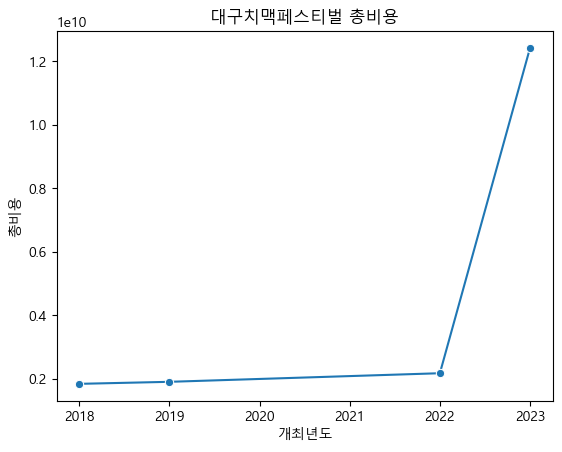

In [61]:
# 대구치맥페스티벌 총비용 이상치
sns.lineplot(dfsel[['개최년도','총비용']][dfsel['축제명']=='대구치맥페스티벌'],x='개최년도',y='총비용',
             marker='o')
plt.title('대구치맥페스티벌 총비용')
plt.show()
# 2023년에 확 튀는 것으로 보아 데이터에 오류가 있는 듯함

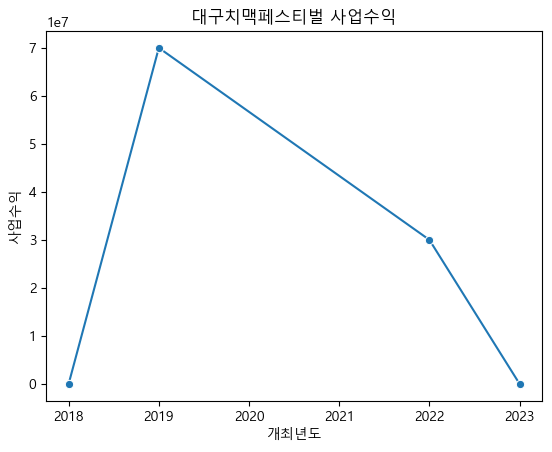

In [62]:
# 대구치맥페스티벌 사업수익
sns.lineplot(dfsel[['개최년도','사업수익']][dfsel['축제명']=='대구치맥페스티벌'],x='개최년도',y='사업수익',
             marker='o')
plt.title('대구치맥페스티벌 사업수익')
plt.show()
# 총비용이 2023년에 갑자기 증가한 것을 설명하는 데 도움이 되지 않음.

# 방문자 수 이상치 확인

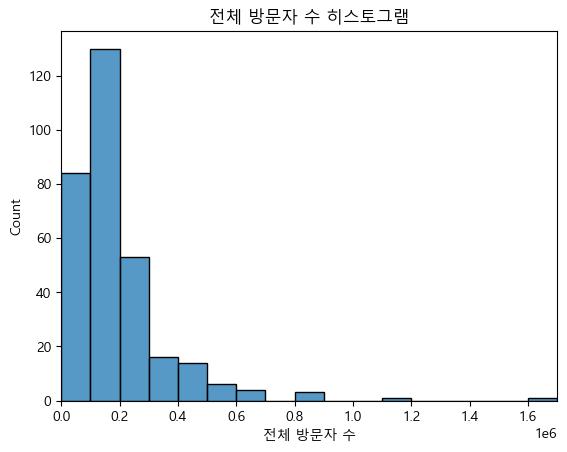

In [63]:
# 방문자 수 히스토그램
sns.histplot(dfsel,x='(전체)방문자수',binwidth=100000,binrange=(0,1700000))
plt.xlabel('전체 방문자 수')
plt.xlim(0,1700000)
plt.title('전체 방문자 수 히스토그램')
plt.show()

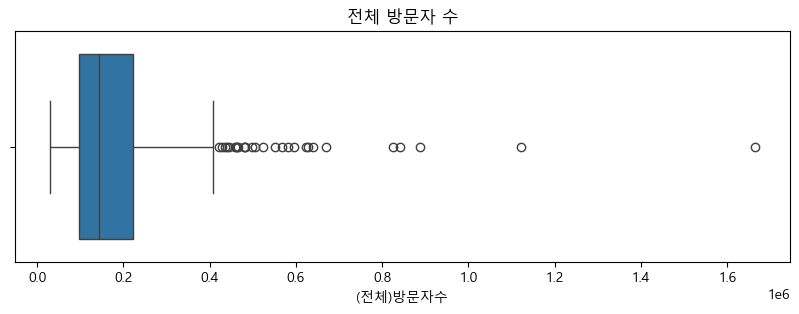

In [64]:
# 방문자 수 boxplot
fig=plt.figure(figsize=(10,3))
sns.boxplot(x=dfsel['(전체)방문자수'],vert=False)
plt.title('전체 방문자 수')
plt.show()

In [65]:
dfsel[['축제명','개최년도','(전체)방문자수','일평균 방문자수','도','index_x']].sort_values(by='(전체)방문자수',ascending=False).head(10)

,축제명,개최년도,(전체)방문자수,일평균 방문자수,도,index_x
97,보령머드축제,2022,1663609,53664.8065,충남,보령머드축제2022
253,진주유등축제,2022,1120998,50954.4545,경남,진주유등축제2022
212,원주한지문화제,2022,886702,80609.2727,강원,원주한지문화제2022
98,보령머드축제,2023,841990,49528.8235,충남,보령머드축제2023
213,원주한지문화제,2023,825403,82540.3000,강원,원주한지문화제2023
254,진주유등축제,2023,669984,44665.6000,경남,진주유등축제2023
251,진주유등축제,2018,638635,45616.7857,경남,진주유등축제2018
109,부천국제만화축제,2019,628997,125799.4000,경기,부천국제만화축제2019
107,부안마실축제,2022,622752,23064.8889,전북,부안마실축제2022
192,영주풍기인삼축제,2022,594700,24779.1667,경북,영주풍기인삼축제2022


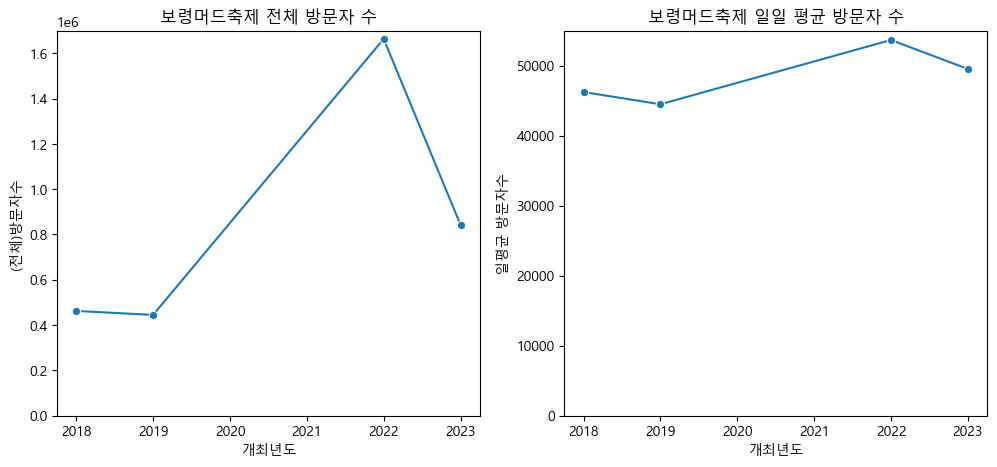

In [66]:
# 보령머드축제 이상치 확인
figure = plt.figure(figsize=(12,5))
x = dfsel['개최년도'][dfsel['축제명']=='보령머드축제']
ax1 = figure.add_subplot(1,2,1)
sns.lineplot(x=x, y=dfsel['(전체)방문자수'][dfsel['축제명']=='보령머드축제'],marker='o')
plt.ylim(0,1700000)
plt.title('보령머드축제 전체 방문자 수')
ax2 = figure.add_subplot(1,2,2)
sns.lineplot(x=x, y=dfsel['일평균 방문자수'][dfsel['축제명']=='보령머드축제'],marker='o')
plt.ylim(0,55000)
plt.title('보령머드축제 일일 평균 방문자 수')
plt.show()
# 전체 방문자 수가 급증할 때 일일 방문자 수는 약간 증가한 것으로 보아 오류는 아닌 것으로 생각됨.

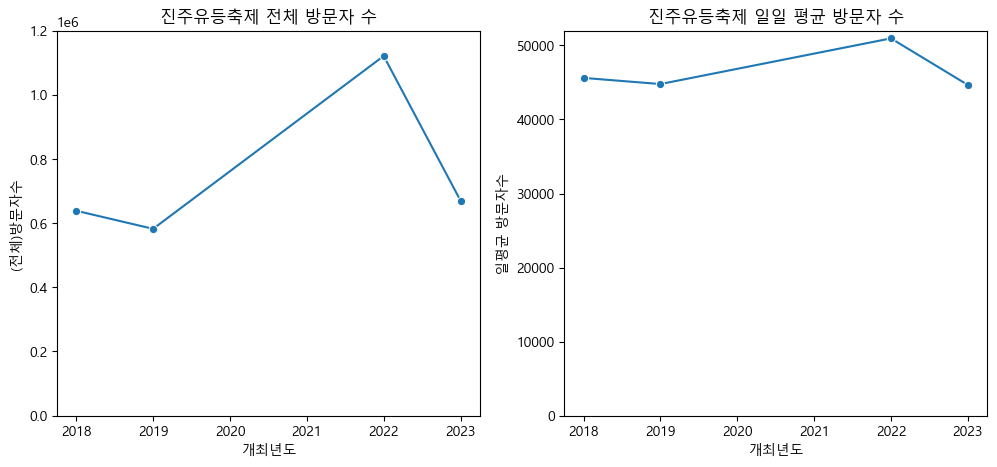

In [67]:
# 진주유등축제 이상치 확인
figure = plt.figure(figsize=(12,5))
x = dfsel['개최년도'][dfsel['축제명']=='진주유등축제']
ax1 = figure.add_subplot(1,2,1)
sns.lineplot(x=x, y=dfsel['(전체)방문자수'][dfsel['축제명']=='진주유등축제'],marker='o')
plt.ylim(0,1200000)
plt.title('진주유등축제 전체 방문자 수')
ax2 = figure.add_subplot(1,2,2)
sns.lineplot(x=x, y=dfsel['일평균 방문자수'][dfsel['축제명']=='진주유등축제'],marker='o')
plt.title('진주유등축제 일일 평균 방문자 수')
plt.ylim(0,52000)
plt.show()
# 전체 방문자 수가 급증할 때 일일 방문자 수도 함께 증가한 것으로 보아 오류는 아닌 것으로 생각됨.

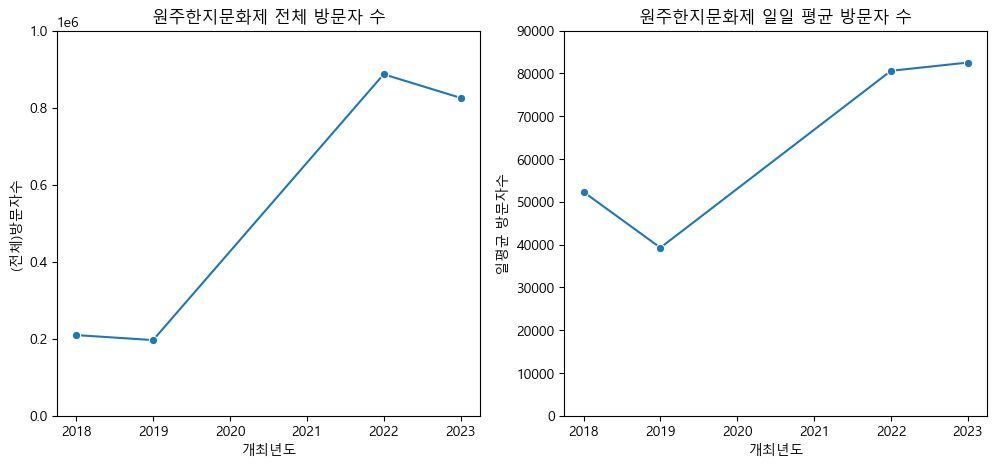

In [68]:
# 원주한지문화제 이상치 확인
figure = plt.figure(figsize=(12,5))
x = dfsel['개최년도'][dfsel['축제명']=='원주한지문화제']
ax1 = figure.add_subplot(1,2,1)
sns.lineplot(x=x, y=dfsel['(전체)방문자수'][dfsel['축제명']=='원주한지문화제'],marker='o')
plt.ylim(0,1000000)
plt.title('원주한지문화제 전체 방문자 수')
ax2 = figure.add_subplot(1,2,2)
sns.lineplot(x=x, y=dfsel['일평균 방문자수'][dfsel['축제명']=='원주한지문화제'],marker='o')
plt.title('원주한지문화제 일일 평균 방문자 수')
plt.ylim(0,90000)
plt.show()
# 전체 방문자 수가 급증할 때 일일 방문자 수도 함께 증가한 것으로 보아 오류는 아닌 것으로 생각됨.

In [69]:
# 진주유등축제 축제기간
dfsel[['축제명','개최년도','축제기간(일)']][dfsel['축제명']=='진주유등축제']

,축제명,개최년도,축제기간(일)
251,진주유등축제,2018,14
252,진주유등축제,2019,13
253,진주유등축제,2022,22
254,진주유등축제,2023,15


In [70]:
# 원주한지문화제 축제기간
dfsel[['축제명','개최년도','축제기간(일)']][dfsel['축제명']=='원주한지문화제']

,축제명,개최년도,축제기간(일)
210,원주한지문화제,2018,4
211,원주한지문화제,2019,5
212,원주한지문화제,2022,11
213,원주한지문화제,2023,10


In [71]:
# 보령머드축제 축제기간
dfsel[['축제명','개최년도','축제기간(일)']][dfsel['축제명']=='보령머드축제']

,축제명,개최년도,축제기간(일)
95,보령머드축제,2018,10
96,보령머드축제,2019,10
97,보령머드축제,2022,31
98,보령머드축제,2023,17


# 사업수익

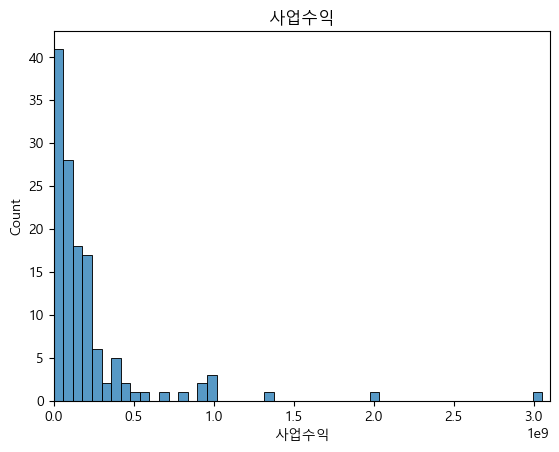

In [72]:
# 사업수익 히스토그램
sns.histplot(dfsel[dfsel['사업수익']!=0],x='사업수익')
plt.xlabel('사업수익')
plt.xlim(0,3100000000)
plt.title('사업수익')
plt.show()

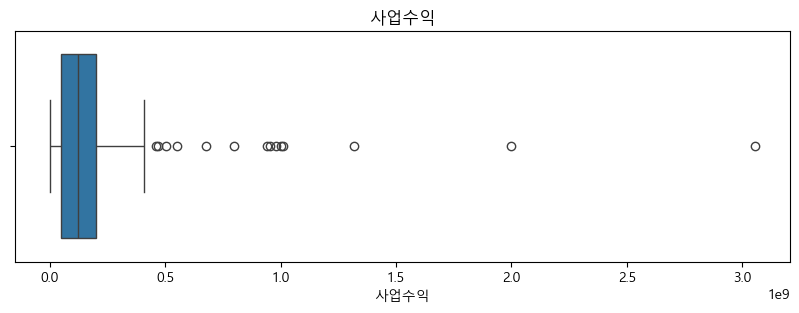

In [73]:
# 사업수익 boxplot
fig=plt.figure(figsize=(10,3))
sns.boxplot(x=dfsel[dfsel['사업수익']!=0]['사업수익'],vert=False)
plt.title('사업수익')
plt.show()

In [74]:
dfsel[['축제명','개최년도','총비용','사업수익','index_x']].sort_values(by='사업수익',ascending=False).head(10)

,축제명,개최년도,총비용,사업수익,index_x
313,화천산천어축제,2019,5.268486e+09,3.053558e+09,화천산천어축제2019
265,추억의충장축제,2022,2.932100e+09,2.000000e+09,추억의충장축제2022
14,곡성세계장미축제,2018,3.000000e+08,1.319292e+09,곡성세계장미축제2018
263,추억의충장축제,2018,1.332130e+09,1.010000e+09,추억의충장축제2018
87,문경찻사발축제,2018,1.123725e+09,1.000000e+09,문경찻사발축제2018
15,곡성세계장미축제,2019,4.100000e+08,9.806500e+08,곡성세계장미축제2019
305,함평나비축제,2019,8.909010e+08,9.546980e+08,함평나비축제2019
88,문경찻사발축제,2019,1.180000e+09,9.400000e+08,문경찻사발축제2019
304,함평나비축제,2018,9.778340e+08,7.996370e+08,함평나비축제2018
82,목포항구축제,2023,9.684214e+08,6.778950e+08,목포항구축제2023


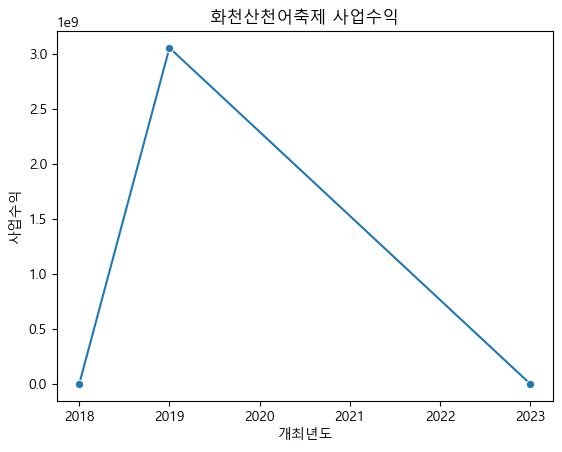

In [75]:
# 화천산천어축제 이상치 확인
x = dfsel['개최년도'][dfsel['축제명']=='화천산천어축제']
sns.lineplot(x=x, y=dfsel['사업수익'][dfsel['축제명']=='화천산천어축제'],marker='o')
plt.title('화천산천어축제 사업수익')
plt.show()
# 전후 연도에 사업수익이 결측치이기 때문에 경향성을 파악하기 어려움.

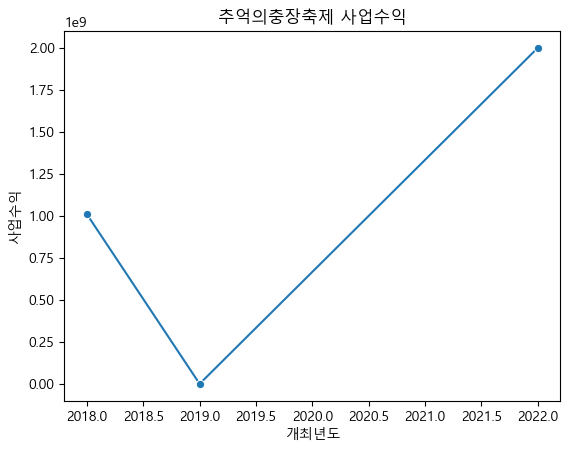

In [76]:
# 추억의충장축제 이상치 확인
x = dfsel['개최년도'][dfsel['축제명']=='추억의충장축제']
sns.lineplot(x=x, y=dfsel['사업수익'][dfsel['축제명']=='추억의충장축제'],marker='o')
plt.title('추억의충장축제 사업수익')
plt.show()
# 전년도에 사업수익이 결측치이기 때문에 경향성을 파악하기 어려움.

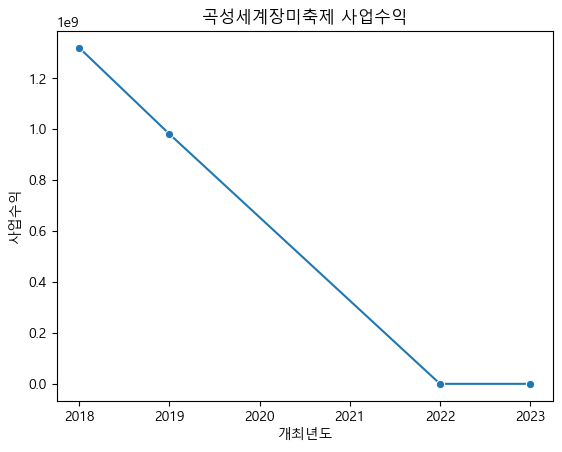

In [77]:
# 곡성세계장미축제 이상치 확인
x = dfsel['개최년도'][dfsel['축제명']=='곡성세계장미축제']
sns.lineplot(x=x, y=dfsel['사업수익'][dfsel['축제명']=='곡성세계장미축제'],marker='o')
plt.title('곡성세계장미축제 사업수익')
plt.show()
# 후년도에 사업수익이 결측치이기 때문에 경향성을 파악하기 어려움.